![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [265]:
# Library 
import pandas as pd
import matplotlib.pyplot as plt

In [266]:
# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [267]:
# which school are best in math?
best_math_schools = schools[schools['average_math'] > 640][['school_name', 'average_math']]
best_math_schools = best_math_schools.sort_values(by="average_math", ascending=False)
print(best_math_schools.head(5))

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683


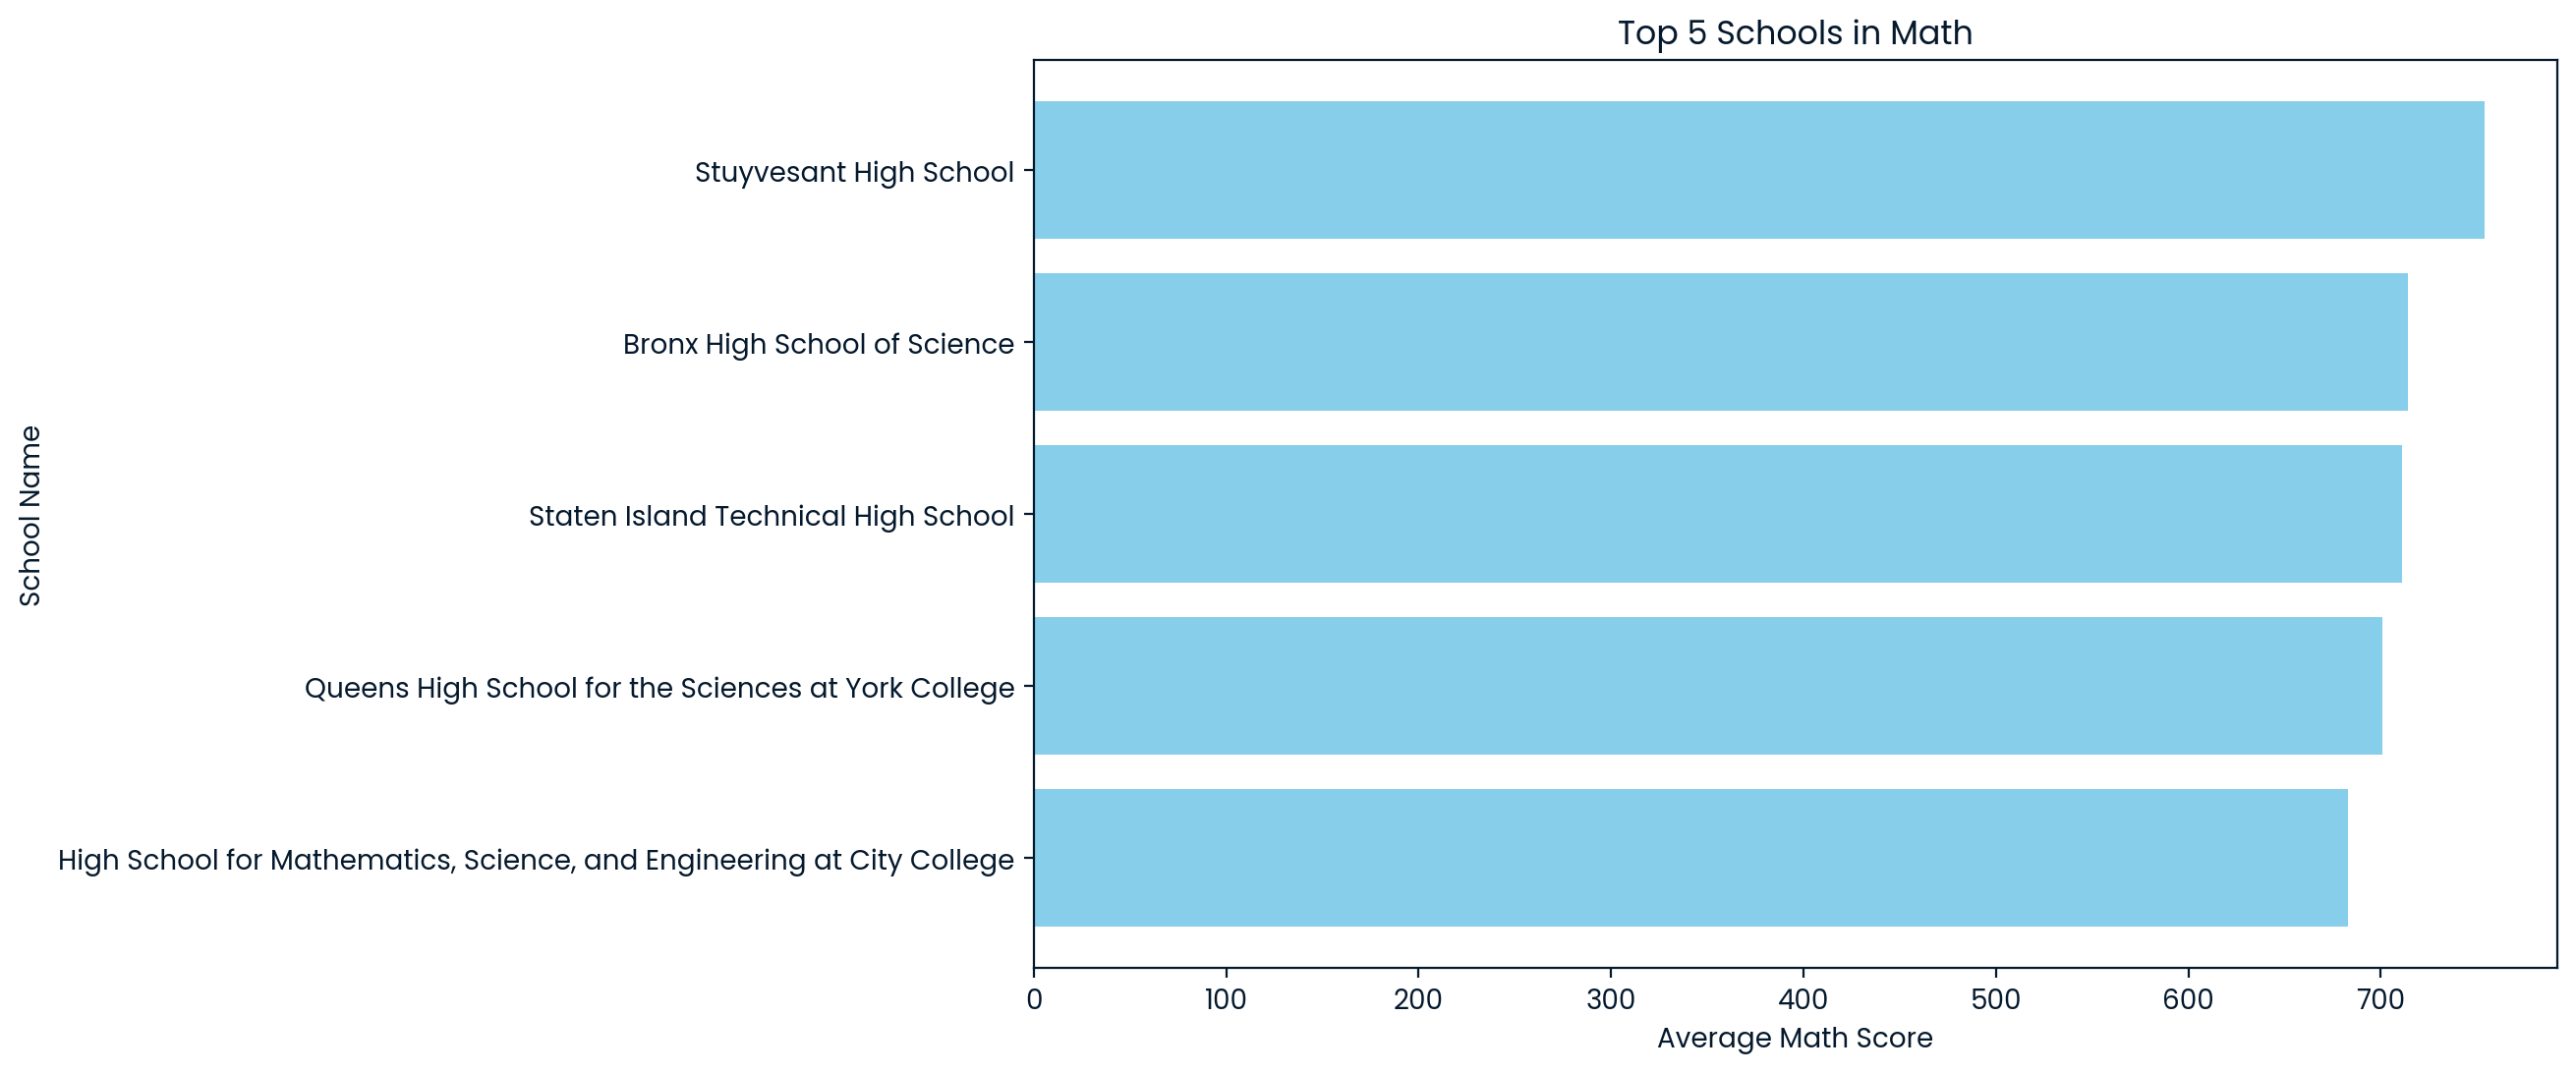

In [268]:
top_5_math_schools = best_math_schools[["school_name", "average_math"]].head(5)

# create bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_math_schools["school_name"], top_5_math_schools["average_math"], color='skyblue')
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.title('Top 5 Schools in Math')
plt.gca().invert_yaxis()  # to convert sort
plt.show()

In [269]:
# calculate total_SAT per school
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


In [270]:
# what is the Top 10 Performing Schools?
Top_Schools = schools.sort_values(by="total_SAT", ascending=False)
print("Top 10 performing schools: ", Top_Schools[["school_name", "total_SAT"]].head(10))

Top 10 performing schools:                                             school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


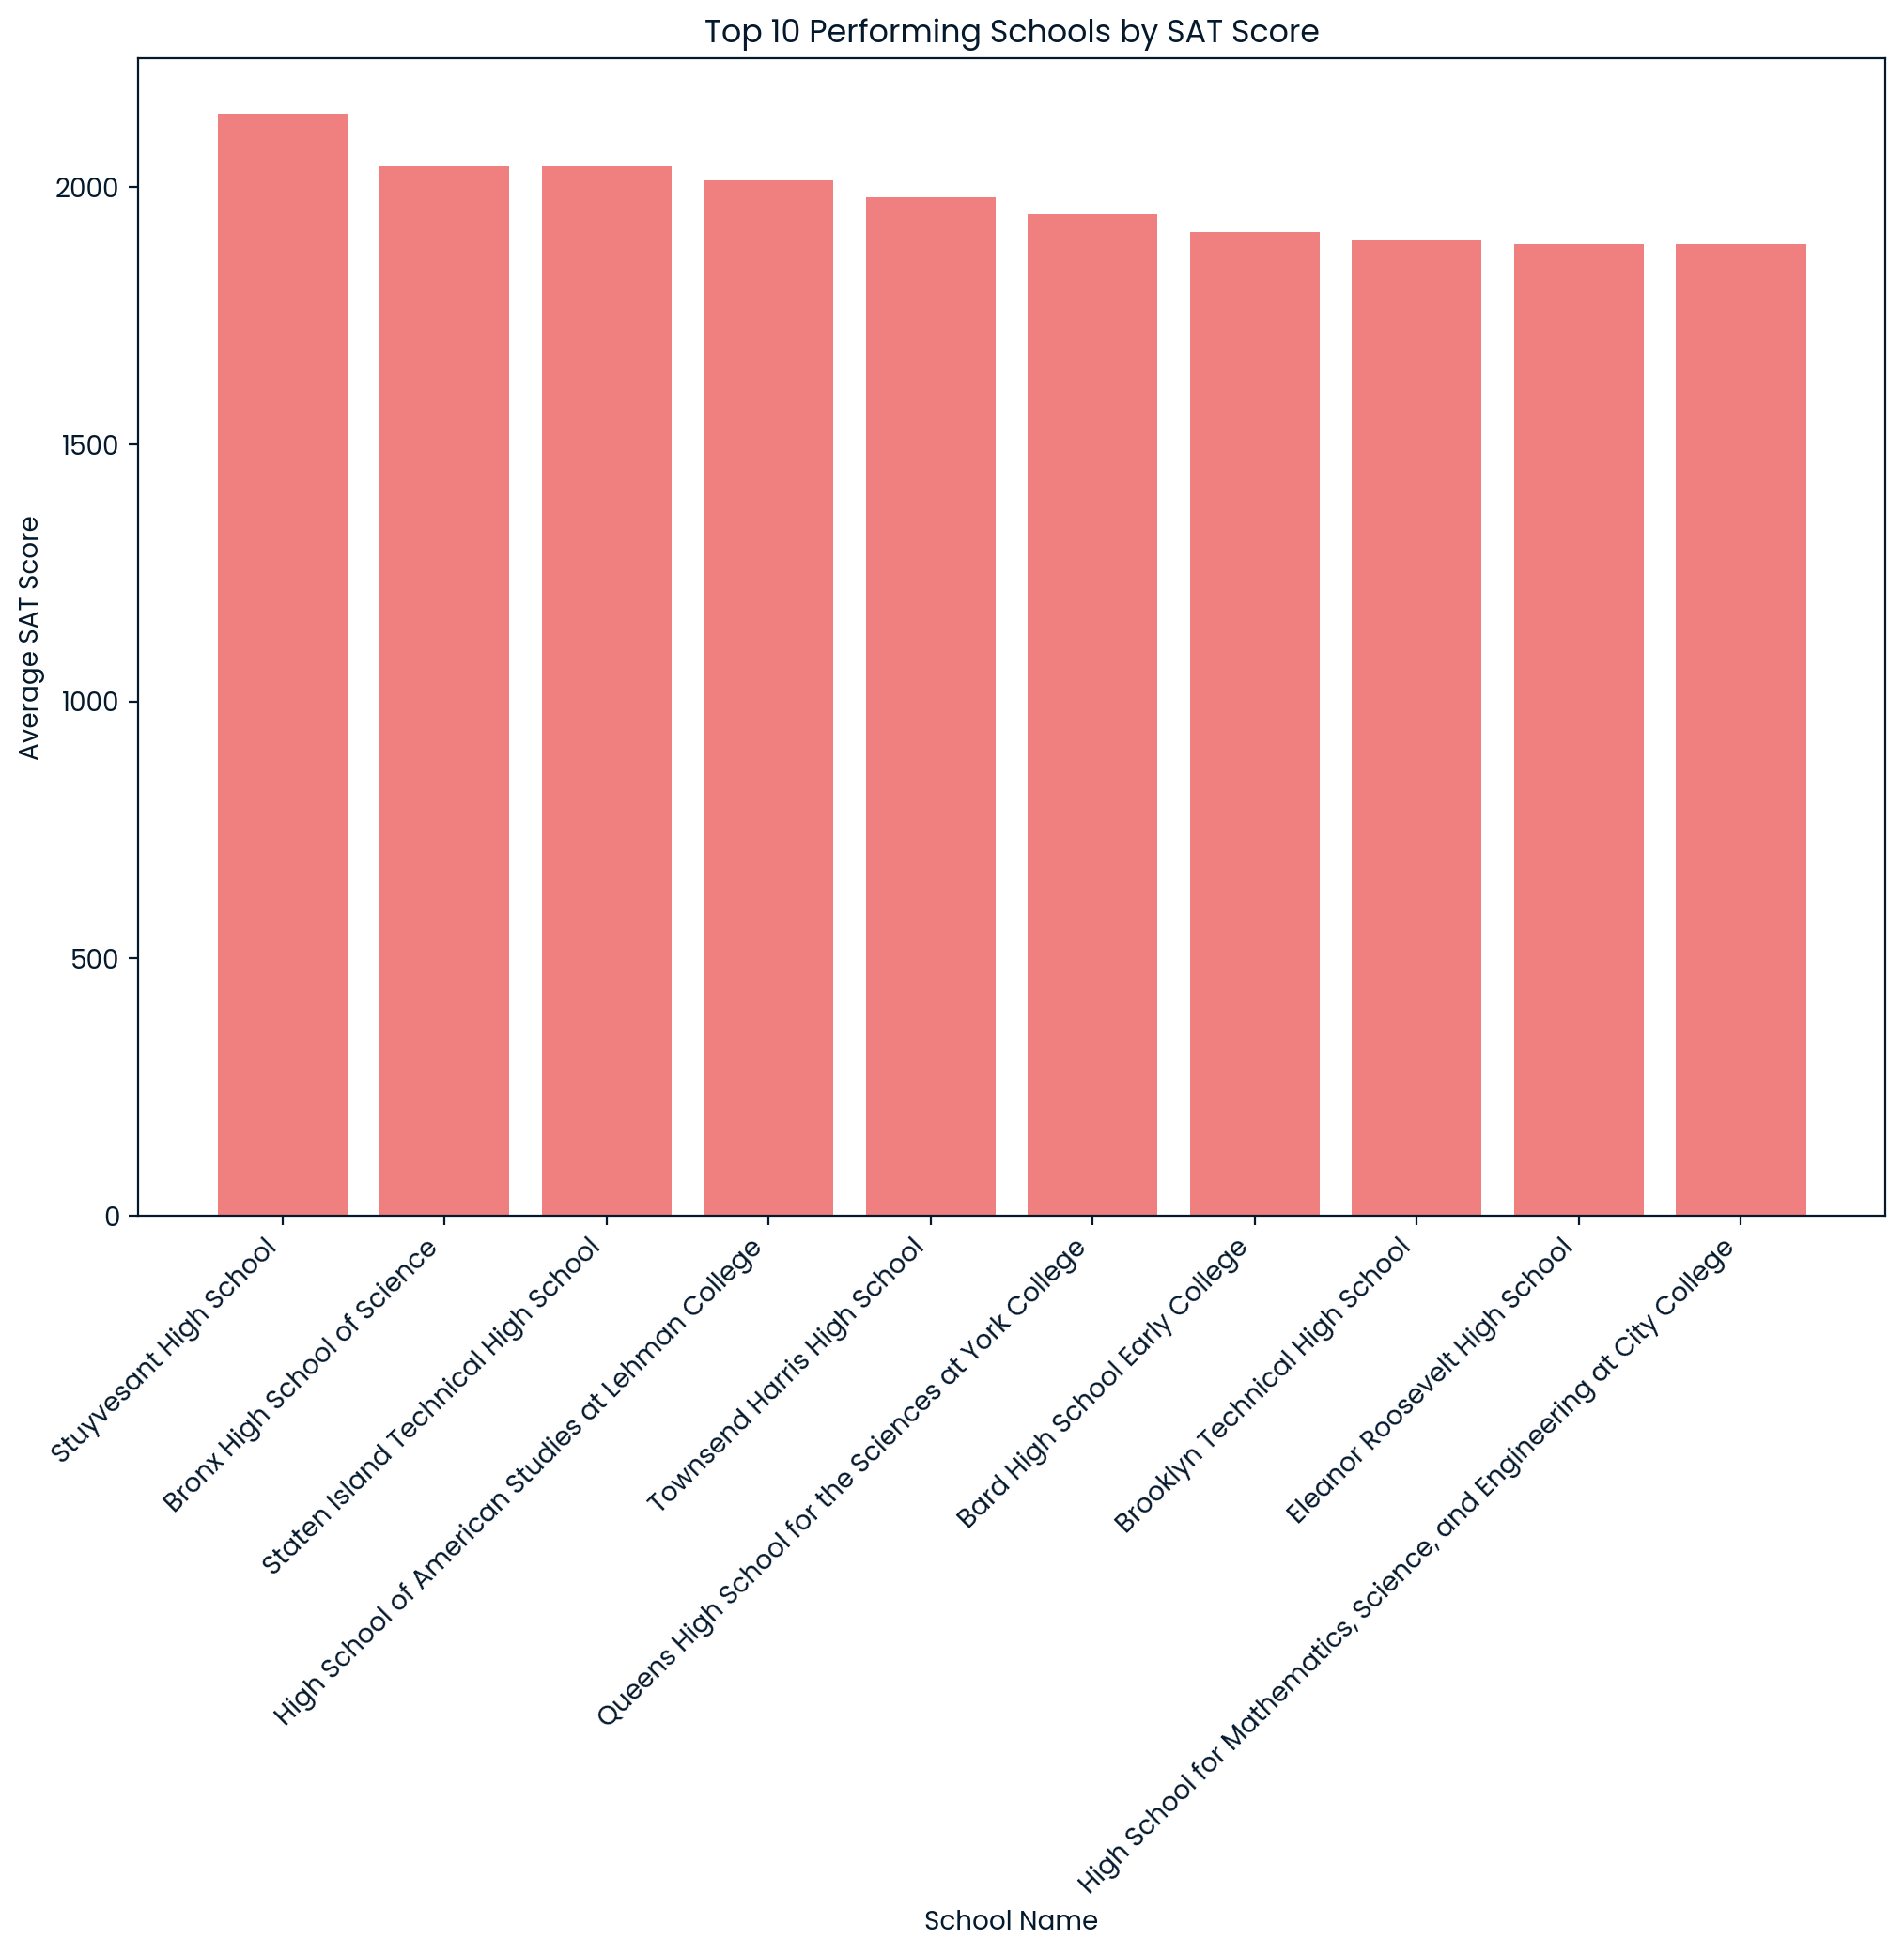

In [271]:
# the top 10 schools based on "total_SAT"
top_10_schools = Top_Schools[["school_name", "total_SAT"]].head(10)

#create bar chart 
plt.figure(figsize=(12, 8))
plt.bar(top_10_schools["school_name"], top_10_schools["total_SAT"], color='lightcoral')
plt.ylabel('Average SAT Score')
plt.xlabel('School Name')
plt.title('Top 10 Performing Schools by SAT Score')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [272]:
# Borough with standard deviation 
largest_std_dev = schools.groupby('borough')['total_SAT'].std().sort_values(ascending=False)
print("Boroughs by Standard Deviation:")
print(borough_std)

Boroughs by Standard Deviation:
borough
Manhattan        230.294140
Staten Island    222.303596
Queens           195.252899
Brooklyn         154.868427
Bronx            150.393901
Name: total_SAT, dtype: float64


<AxesSubplot: title={'center': 'Borough with Sandard deviation'}, xlabel='borough'>

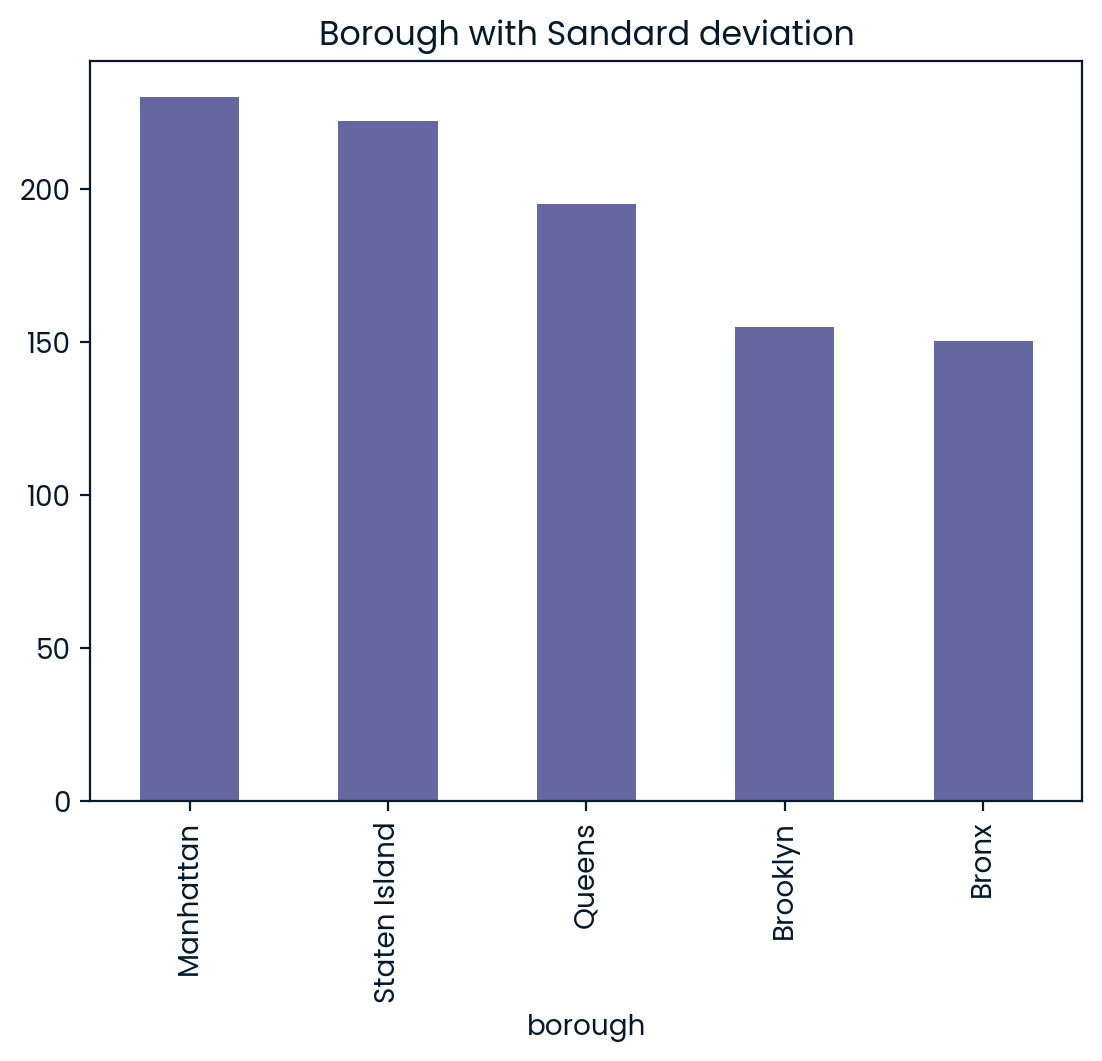

In [273]:
#plot 
largest_std_dev.plot(kind = "bar", title = "Borough with Sandard deviation")

In [274]:
# The borough with the largest standard deviation
std_dev_by_borough = schools.groupby('borough')['total_SAT'].std()
largest_std_dev_borough = std_dev_by_borough.idxmax()
largest_std_dev_value = std_dev_by_borough.max().round(2)
largest_std_dev_value = round(largest_std_dev_value, 2)

print(f"Borough with the largest standard deviation: {largest_std_dev_borough}")
print(f"Largest standard deviation value: {largest_std_dev_value}")

Borough with the largest standard deviation: Manhattan
Largest standard deviation value: 230.29


In [275]:
import pandas as pd

# Calculate standard deviation, number of schools, average SAT score, and std_SAT for each borough
stats_by_borough = schools.groupby('borough').agg(
    std_SAT=('total_SAT', 'std'), 
    num_schools=('school_name', 'count'),
    average_SAT=('total_SAT', 'mean')
)

# Find the borough with the largest standard deviation
largest_std_dev_borough = stats_by_borough['std_SAT'].idxmax()
largest_std_dev_value = stats_by_borough.loc[largest_std_dev_borough, 'std_SAT'].round(2)
num_schools_in_borough = stats_by_borough.loc[largest_std_dev_borough, 'num_schools']
average_SAT_in_borough = stats_by_borough.loc[largest_std_dev_borough, 'average_SAT'].round(2)

# Create a DataFrame with the results
largest_std_dev = pd.DataFrame({
    'borough': [largest_std_dev_borough],
    'std_SAT': [largest_std_dev_value],
    'num_schools': [num_schools_in_borough],
    'average_SAT': [average_SAT_in_borough]
})

# Display the result
print(largest_std_dev)

     borough  std_SAT  num_schools  average_SAT
0  Manhattan   230.29           89      1340.13
